In [133]:
import numpy as np
import os.path
import pandas
import matplotlib
import scipy.signal

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

data_dir = "K:\\ns\qt\Diamond\Setups\LT5\Positioning stage characterization"

## Interferometric traces
For the data acquired on 28Nov17, 1V = 50nm

### Internal mirror

In [243]:
file_name = "17_11_28_interferometric_trace_external_50nmV_xy_pump.csv"

filename = os.path.join(data_dir,file_name)

data = pandas.read_csv(os.path.join(data_dir,filename),header=0,skiprows = 0,nrows=1)
TimeRes = data['Increment'][0]

data = pandas.read_csv(os.path.join(data_dir,filename),header=None,skiprows = 2)
data = data.drop([0,2],1)
data = data.as_matrix()
#removing bad data
data = data[:1100000].copy()

t = TimeRes*np.arange(len(data))

nmPerV = 50.0
data = data*nmPerV

# NormMax = np.amax(data); NormMin = np.amin(data)
# data = (np.array(data)-(NormMax+NormMin)/2)*(2./(NormMax-NormMin)) 

[]

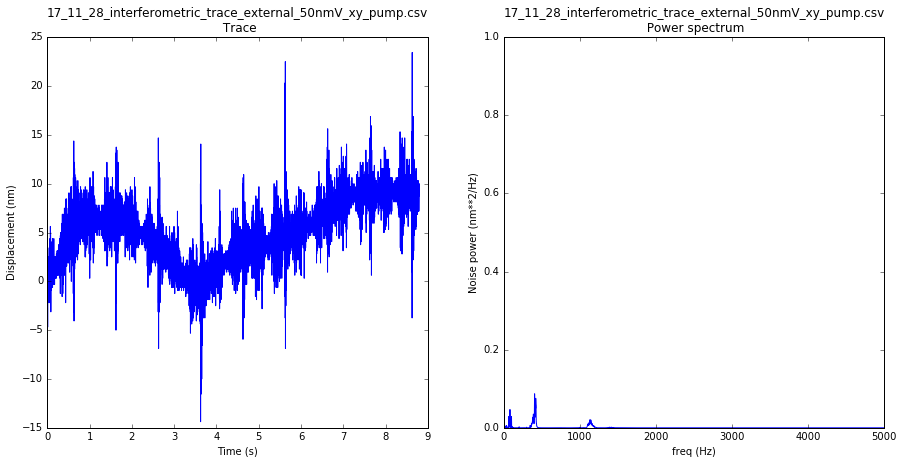

In [244]:
freq_pow, power = scipy.signal.welch(data, axis = 0, fs = 1/TimeRes, nperseg = 100000)

fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1,2,1)
plt.plot(t[::200],data[::200])
plt.xlabel('Time (s)')
plt.ylabel('Displacement (nm)')
plt.title(file_name + '\n Trace')

ax = plt.subplot(1,2,2)
plt.plot(freq_pow, power)
plt.xlim([0,5000])
plt.ylim([0,1])
plt.xlabel('freq (Hz)')
plt.ylabel('Noise power (nm**2/Hz)')
plt.title(file_name + '\n Power spectrum')

#plt.savefig(os.path.join(data_dir,'fringes_and_noise_power.pdf'))
plt.plot()

[]

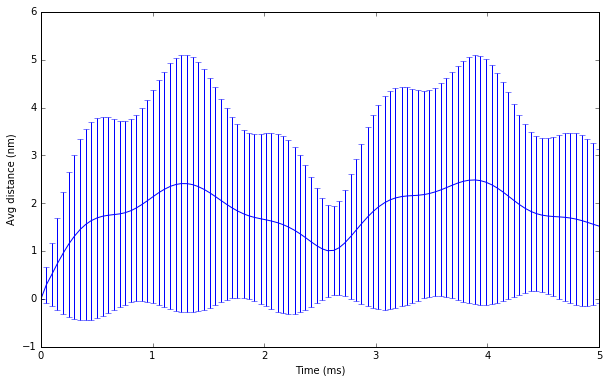

In [245]:
n_pts = 100
end_time = 5 * 1.25e2  # in ms
avg_disp = np.empty((n_pts,2))
times = np.linspace(0,end_time,num=n_pts,dtype=int)
for i, delta_t in enumerate(times):
    diffs = np.abs(data - np.roll(data, -delta_t))
    avg_disp[i,0] = diffs[0:data.size-delta_t].mean()
    avg_disp[i,1] = diffs[0:data.size-delta_t].std()

plt.figure(figsize=(10,6))
plt.errorbar(times/1.25e2, avg_disp[:,0], avg_disp[:,1])
plt.xlabel("Time (ms)")
plt.ylabel("Avg distance (nm)")
plt.plot()

15.1216290344


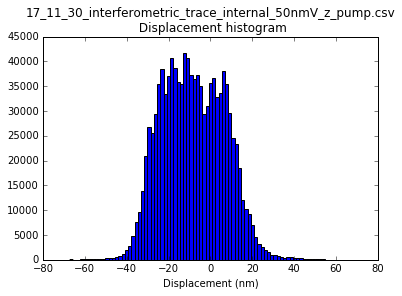

In [237]:
plt.hist(data, 85)



plt.xlabel("Displacement (nm)")
plt.plot()
plt.title(file_name + '\n Displacement histogram')
print np.std(data)

In [238]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=3):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = scipy.signal.filtfilt(b, a, data)
    return y

[]

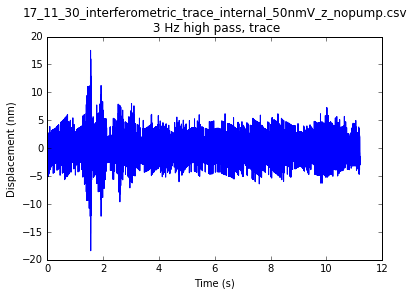

In [230]:
high_pass_data = butter_highpass_filter(data[:,0], 3, 1/TimeRes)
plt.plot(t, high_pass_data)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (nm)')
plt.title(file_name + '\n 3 Hz high pass, trace')
plt.plot()

1.87533748974


[]

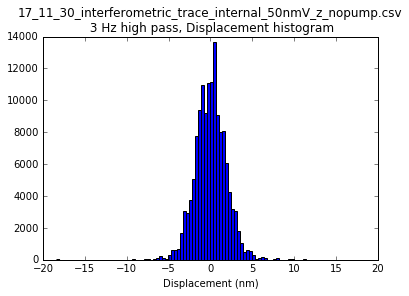

In [231]:
print np.std(high_pass_data)
plt.hist(high_pass_data,100)
plt.xlabel("Displacement (nm)")
plt.title(file_name + '\n 3 Hz high pass, Displacement histogram')
plt.plot()

### External mirror

In [154]:
file_name = "17_11_28_interferometric_trace_external_50nmV.csv"

filename = os.path.join(data_dir,file_name)

data = pandas.read_csv(os.path.join(data_dir,filename),header=0,skiprows = 0,nrows=1)
TimeRes = data['Increment'][0]

data = pandas.read_csv(os.path.join(data_dir,filename),header=None,skiprows = 2)
data = data.drop([0,2],1)
data = data.as_matrix()
#removing bad data
#data = data.copy()

t = TimeRes*np.arange(len(data))

nmPerV = 50.0
data = data*nmPerV

# NormMax = np.amax(data); NormMin = np.amin(data)
# data = (np.array(data)-(NormMax+NormMin)/2)*(2./(NormMax-NormMin)) 

[]

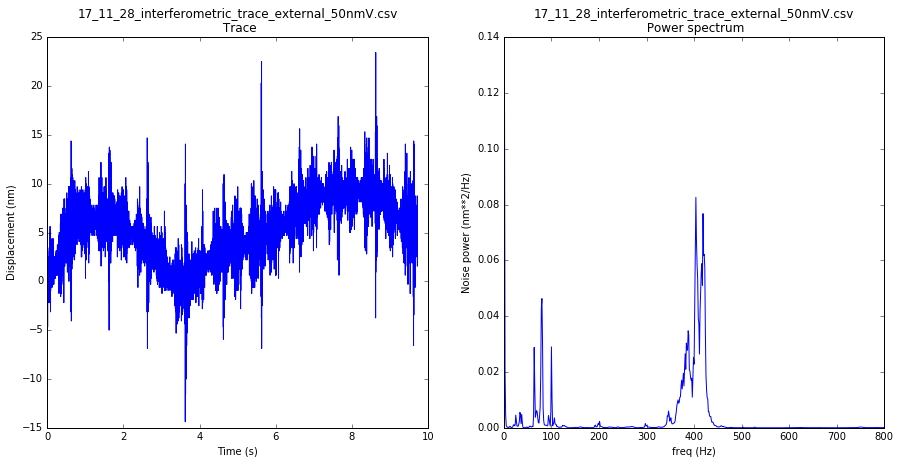

In [155]:
freq_pow, power = scipy.signal.welch(data, axis = 0, fs = 1/TimeRes, nperseg = 100000)

fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1,2,1)
plt.plot(t[::200],data[::200])
plt.xlabel('Time (s)')
plt.ylabel('Displacement (nm)')
plt.title(file_name + '\n Trace')

ax = plt.subplot(1,2,2)
plt.plot(freq_pow, power)
plt.xlim([0,800])
#plt.ylim([1e-7,0.1])
plt.xlabel('freq (Hz)')
plt.ylabel('Noise power (nm**2/Hz)')
plt.title(file_name + '\n Power spectrum')

#plt.savefig(os.path.join(data_dir,'fringes_and_noise_power.pdf'))
plt.plot()

[]

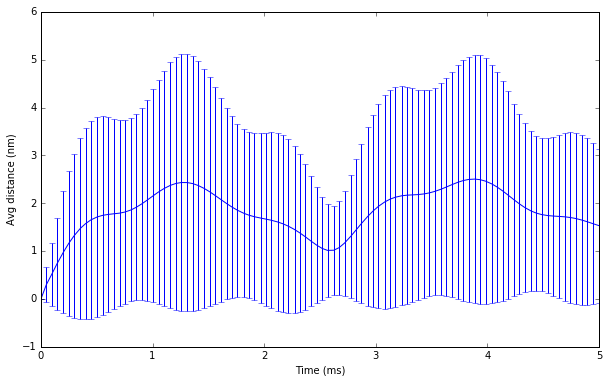

In [156]:
n_pts = 100
end_time = 5 * 1.25e2  # in ms
avg_disp = np.empty((n_pts,2))
times = np.linspace(0,end_time,num=n_pts,dtype=int)
for i, delta_t in enumerate(times):
    diffs = np.abs(data - np.roll(data, -delta_t))
    avg_disp[i,0] = diffs[0:data.size-delta_t].mean()
    avg_disp[i,1] = diffs[0:data.size-delta_t].std()

plt.figure(figsize=(10,6))
plt.errorbar(times/1.25e2, avg_disp[:,0], avg_disp[:,1])
plt.xlabel("Time (ms)")
plt.ylabel("Avg distance (nm)")
plt.plot()

3.35973815629


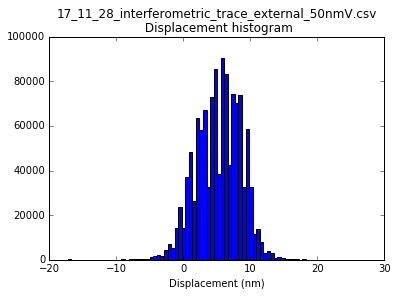

In [157]:
plt.hist(data, 85)
plt.xlabel("Displacement (nm)")
plt.plot()
plt.title(file_name + '\n Displacement histogram')
print np.std(data)

In [158]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=3):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = scipy.signal.filtfilt(b, a, data)
    return y

[]

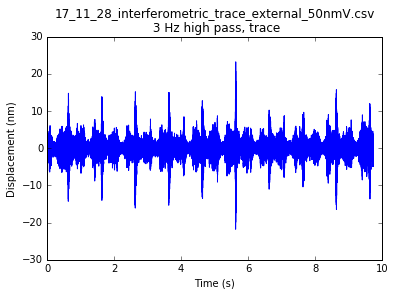

In [159]:
high_pass_data = butter_highpass_filter(data[:,0], 3, 1/TimeRes)
plt.plot(t, high_pass_data)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (nm)')
plt.title(file_name + '\n 3 Hz high pass, trace')
plt.plot()

1.9684648259


[]

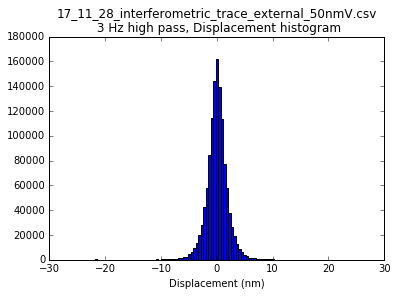

In [160]:
print np.std(high_pass_data)
plt.hist(high_pass_data,100)
plt.xlabel("Displacement (nm)")
plt.title(file_name + '\n 3 Hz high pass, Displacement histogram')
plt.plot()